# Приоритизация гипотез и анализ проведенного A/B теста  

#### Описание проекта

Необходимо проанализировать и приоритизировать несколько гипотез и <br>
проанализировать результат проведенного интернет-магазином A/B теста.
Дать рекомендации по результатам анализа<br>
**Заказчик:** Крупный интеренет-магазин<br>
**Цель:** Найти возможности для увеличения продаж<br>
**Задачи:**
1. Провести анализ и приоритизацию гипотез
2. Проанализировать данные, полученные в ходе проведенного А/В теста
3. Выявить динамику кумулятивной выручки, кумулятиного среднего чека, <br>
   кумулятивного среднего кол-ва заказов, аномалии в данных.
4. Визуализировать свои находки, полученныего в ходе анализа
5. Оценить статистическую значимость различий в группах теста
6. Дать заключение о результатах проведенного А/В теста

Первое что мы сделаем - приоритизация гипотез, далее в ходе анализа А/В теста , так как о качестве данных ничего не известно, мы проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки мы поищем возможность исправить самые критичные ошибки данных. Затем проведем исследовательский анализ и закончим все выводами, полученными в ходе исследования. Таким образом исследование пройдет в четыре этапа:

Приоритизация гипотез<br>
Изучение данных полученных в ходе А/В теста<br>
Предобработка данных<br>
Исследовательский анализ

<a id= 'section1'></a>

**ОГЛАВЛЕНИЕ**
<br>
<b>[1.1 Приоритизация гипотез](#prioritization)<br>
[1.2. Анализ А/В теста](#ABtesting)<br>
    &emsp;*[1.2.1. Изучение данных](#observing)*<br>
    &emsp;*[1.2.2. Предобработка данных](#preparation)*<br>
    &emsp;*[1.2.3. Исследовательский анализ](#reseaching)*<br>
        &emsp;&emsp;-[1.2.3.1. График кумулятивной выручки по группам](#cum_revenue_plot)<br>
        &emsp;&emsp;-[1.2.3.2. График кумулятивного среднего чека по группам](#cum_avg_price_plot)<br>
        &emsp;&emsp;-[1.2.3.3. График относительного изменения кумулятивного среднего чека](#rel_avg_plot)<br>
        &emsp;&emsp;-[1.2.3.4. График кумулятивного среднего кол-ва заказов](#cum_avg_order_qty_plot)<br>
        &emsp;&emsp;-[1.2.3.5. График относительного изменения кумулятивного среднего кол-ва заказов](#rel_cum_avg_order_qty)<br>
        &emsp;&emsp;-[1.2.3.6. Точечный график кол-ва заказов по пользователям](#order_qty_scatter_plot)<br>
        &emsp;&emsp;-[1.2.3.7. 95-й и 99-й перцентили кол-ва заказов на пользователя](#orders_percentiles)<br>
        &emsp;&emsp;-[1.2.3.8. Точечный график стоимостей заказов](#order_price_scatter_plot)<br>
        &emsp;&emsp;-[1.2.3.9. 95-й и 99-й перцентили стоимости заказов](#order_price_percentiles)<br>
        &emsp;&emsp;-[1.2.3.10. Статистическая значимость различий между группами по "сырым" данным](#raw_data)<br>
        &emsp;&emsp;&emsp;&emsp;a.[1.2.3.10.1. Расчет значения p-value для заказов](#p_orders_calc)<br>
        &emsp;&emsp;&emsp;&emsp;b.[1.2.3.10.2. Расчет значения p-value для средних чеков](#p_avg_calc)<br>
        &emsp;&emsp;-[1.2.3.11. Статистическая значимость различий между группами по "очищенным" данным](#clean_data)<br>
        &emsp;&emsp;&emsp;&emsp;a.[1.2.3.11.1. Расчет значения p-value для заказов](#p_orders_calc2)<br>
        &emsp;&emsp;&emsp;&emsp;b.[1.2.3.11.2. Расчет значения p-value для средних чеков](#p_avg_calc2)<br>
    &emsp;*[1.2.4. Итоги А/В теста](#resume)*<br>
[1.3. Общие выводы](#general_resume)

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats as st

In [2]:
pd.set_option("display.float_format", "{:.2f}".format)

<a id="prioritization"> </a>
## Приоритизация гипотез.
<a href="#section1">Оглавление</a>

Прочитаем данные из файла:

In [3]:
try:
    data = pd.read_csv('/datasets/hypothesis.csv')
except:
    data = pd.read_csv('hypothesis.csv')

Посмотрим на данные:

In [4]:
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Напишем функцию подсветки максимального значения в столбце:

Приоритезируем гипотезы по методу "ICE":

In [5]:
data['ICE'] = (data['Impact'] * data['Confidence'] / data['Efforts']).round(2)
data_sorted = data.sort_values(by='ICE', ascending=False)
data_sorted.style.highlight_max(subset=['ICE'], color='palegreen',axis=0).format('{:.2f}', subset=['ICE'])

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Мы видим, что максимальное кол-во очков набрала гипотеза номер 8 и она заняла первое место.

Приоритизируем гипотезы по методу "RICE":

In [6]:
data['RICE'] = data['Reach'] * data['Impact'] * data['Confidence'] / data['Efforts']
data_sorted = data.sort_values(by='RICE', ascending=False)
data_sorted.style.highlight_max(subset=['ICE','RICE'], color='palegreen',axis=0).format('{:.2f}', subset=['ICE','RICE'])

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


После применения метода "RICE" лидер сменился. Новый лидер среди гипотез - гипотеза:'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	'. Наш прежний лидер - гипотеза:'Запустить акцию, дающую скидку на товар в день рождения' откатилась на 5 место. Причина этого высокое значение гипотезы-лидера в столбце "Reach" - охват - значение 10. В то время как у гипотезы 'Запустить акцию, дающую скидку на товар в день рождения' значение "Reach" всего лишь 1. Таким образом наивысший приоритет среди всех гипотез имеет гипотеза с самым широким охватом аудитории.

<a id="ABtesting"> </a>
## Анализ A/B-теста
<a href="#section1">Оглавление</a>

<a id="observing"> </a>
### Изучение данных
<a href="#section1">Оглавление</a>

Прочитаем данные из файлов:

In [7]:
try:
    df_ord = pd.read_csv('/datasets/orders.csv')
    df_vis = pd.read_csv('/datasets/visitors.csv')
except:
    df_ord = pd.read_csv('orders.csv')
    df_vis = pd.read_csv('visitors.csv')

Посмотрим что данные из себя представляют:

In [8]:
df_ord.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
df_vis.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
df_ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Мы видим,что в данных orders пропусков нет.<br>
В датафрейме поле date требует конвертации из строкового типа в тип дата:

In [11]:
df_ord['date'] = df_ord['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [12]:
df_vis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Мы видим,что в данных visitors пропусков нет.<br>
В датафрейме поле date требует конвертации из строкового типа в тип дата:

In [13]:
df_vis['date'] = df_vis['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [14]:
df_ord.describe(include='all')

C:\Users\1395355\AppData\Local\Temp\ipykernel_38988\860136344.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_ord.describe(include='all')


,transactionId,visitorId,date,revenue,group
count,1197.00,1197.00,1197,1197.00,1197
unique,NaN,NaN,31,NaN,2
top,NaN,NaN,2019-08-05 00:00:00,NaN,B
freq,NaN,NaN,48,NaN,640
first,NaN,NaN,2019-08-01 00:00:00,NaN,NaN
last,NaN,NaN,2019-08-31 00:00:00,NaN,NaN
mean,2155621385.53,2165960143.10,NaN,8348.01,NaN
std,1229084904.76,1236014192.15,NaN,39191.13,NaN
min,1062393.00,5114589.00,NaN,50.00,NaN
25%,1166775572.00,1111826046.00,NaN,1220.00,NaN


В поле revenue 75%  всех данных не превышают значения 8290, при этом максимальное значение 1 294 500, что может говорить о выбросах данных в этом поле. В дальнейшем мы с этим разберемся. 

In [15]:
df_vis.describe(include='all')

C:\Users\1395355\AppData\Local\Temp\ipykernel_38988\3018354658.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_vis.describe(include='all')


,date,group,visitors
count,62,62,62.00
unique,31,2,NaN
top,2019-08-01 00:00:00,A,NaN
freq,2,31,NaN
first,2019-08-01 00:00:00,NaN,NaN
last,2019-08-31 00:00:00,NaN,NaN
mean,NaN,NaN,607.29
std,NaN,NaN,114.40
min,NaN,NaN,361.00
25%,NaN,NaN,534.00


В датасете в поле visitors наблюдается смещение данных в сторону макисмальных значений: медиана - 624,<br> 
а максимальное значение - 770 

<a id="preparation"> </a>
### Предобработка данных
<a href="#section1">Оглавление</a>

Проверим датасеты на дубликаты:

In [16]:
df_vis.duplicated().sum()

0

In [17]:
df_ord.duplicated().sum()

0

Дубликатов в датасетах нет

Посмотрим на распределение в датасете и одинственный столбец который нам интересен с точки зрения распределения - 'revenue':

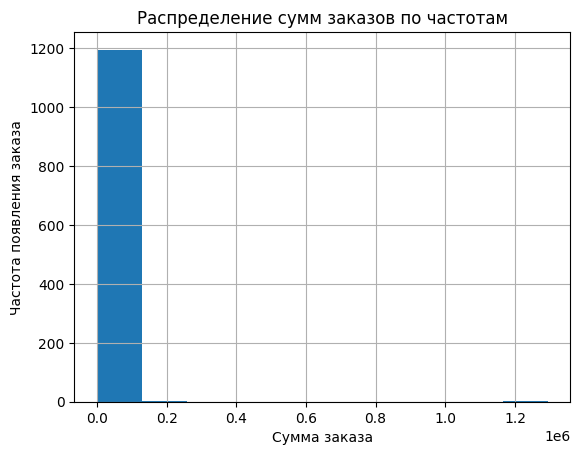

In [18]:
df_ord['revenue'].hist()
plt.xlabel('Сумма заказа')
plt.ylabel('Частота появления заказа')
plt.title('Распределение сумм заказов по частотам')
plt.show()

Картина не очень информативна и данные не имеют вид нормального распределения. Попрбуем посмотреть распределение по другому:

In [19]:
x_values = range(len(df_ord))

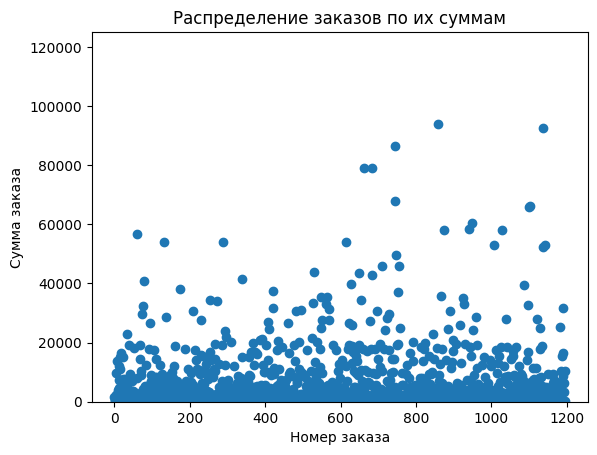

In [20]:
plt.scatter(x_values, df_ord['revenue'])
plt.ylim(0, 125000);
plt.xlabel('Номер заказа')
plt.ylabel('Сумма заказа')
plt.title('Распределение заказов по их суммам')
plt.show()

Мы видим, что большая часть данных сосредоточена в пределах 30000<br>
Попробуем еще один вариант представления данных - boxplot:

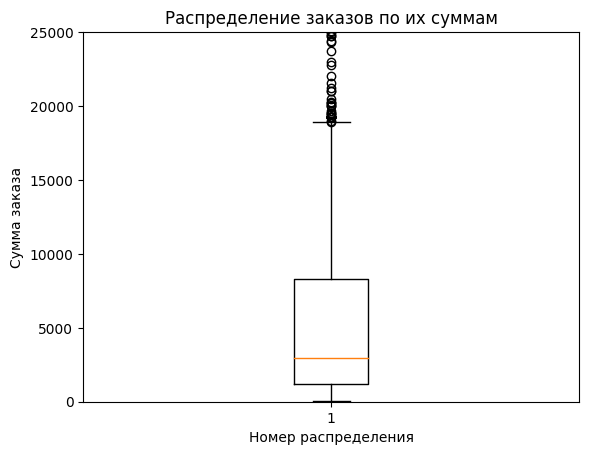

In [21]:
plt.boxplot(df_ord['revenue'])
plt.ylim(0,25000)
plt.xlabel('Номер распределения')
plt.ylabel('Сумма заказа')
plt.title('Распределение заказов по их суммам')
plt.show()

Большая часть данных располагается выше 1000 и ниже 10000 с медианой в районе 3000.

Рассмотрим данные в датасете visitors, в столбце 'visitors':

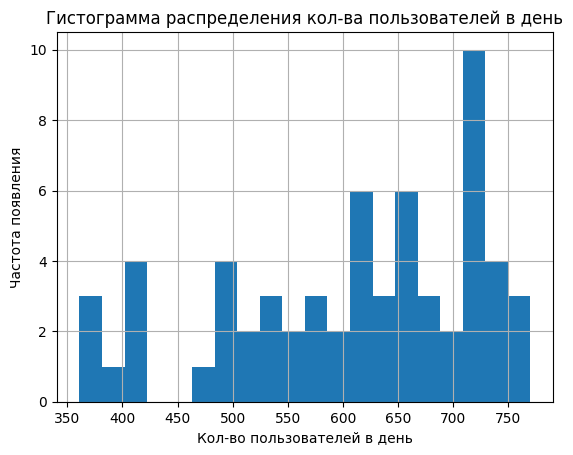

In [22]:
df_vis['visitors'].hist(bins=20)
plt.xlabel('Кол-во пользователей в день')
plt.ylabel('Частота появления')
plt.title('Гистограмма распределения кол-ва пользователей в день')
plt.show()

На гистограмме наблюдается более-менее равномерное распределение данных, с ростом в большую сторону.<br>
При этом мы должны признать, что данные распределены не нормально.

In [23]:
x_values = range(len(df_vis))

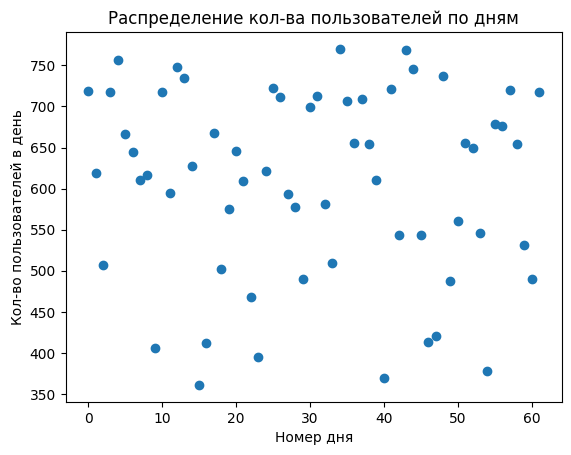

In [24]:
plt.scatter(x_values, df_vis['visitors'])
plt.xlabel('Номер дня')
plt.ylabel('Кол-во пользователей в день')
plt.title('Распределение кол-ва пользователей по дням')
plt.show()

Мы видим, что данные распределены по всему графику, с чуть большей плотностью в верхней части графика, подтверждение гистограммы выше.

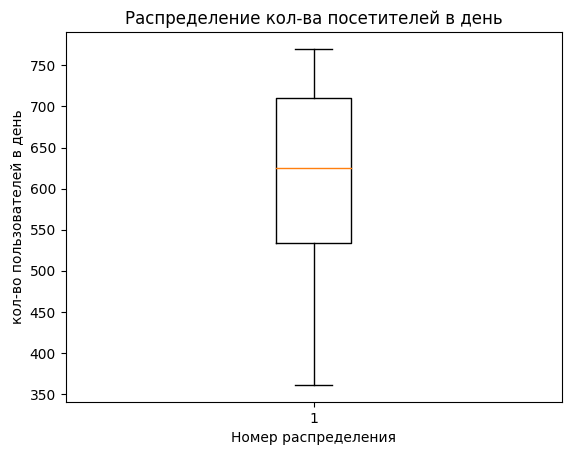

In [25]:
plt.boxplot(df_vis['visitors'])
plt.xlabel('Номер распределения')
plt.ylabel('кол-во пользователей в день')
plt.title('Распределение кол-ва посетителей в день')
plt.show()

Boxplot показывает нам однозначно, что большая часть данных лежит выше 530, но ниже 730.

Сколько групп было в А/В тесте

In [26]:
df_vis['group'].nunique()

2

Мы видим, что кол-во групп в А/В тесте 2

Посмотрим, сколько пользователей в каждой группе в датасете visitors:

In [27]:
df_vis.columns

Index(['date', 'group', 'visitors'], dtype='object')

In [28]:
df_vis.groupby('group')['visitors'].sum()

group
A    18736
B    18916
Name: visitors, dtype: int64

In [29]:
round(df_vis.query('group == "A"')['visitors'].sum() / df_vis.query('group == "B"')['visitors'].sum(), 3)

0.99

Кол-во визитов в каждой группе примерно одинаковое

Посмотрим на кол-во клиентов в каждой группе в датасете orders:

In [30]:
df_ord.groupby('group')['visitorId'].nunique()

group
A    503
B    586
Name: visitorId, dtype: int64

In [31]:
round(df_ord.query('group == "A"')['visitorId'].nunique() / df_ord.query('group == "B"')['visitorId'].nunique(), 3)

0.858

Наблюдается перекос данных в сторону В группы

Посмотрим не попадают ли пользователи из одной группы в другую - ищем через пересечение множеств:

In [32]:
df_ord.shape

(1197, 5)

In [33]:
len(set(df_ord.query('group=="A"')['visitorId'].unique()).intersection(df_ord.query('group=="B"')['visitorId'].unique()))

58

In [34]:
res = set(df_ord.query('group=="A"')['visitorId'].unique()
       ).intersection(df_ord.query('group=="B"')['visitorId'].unique())

In [35]:
df_ord = df_ord[~df_ord['visitorId'].isin(res)]

In [36]:
len(set(df_ord.query('group=="A"')['visitorId'].unique()).intersection(df_ord.query('group=="B"')['visitorId'].unique()))

0

Больше клиенты в группах не пересекаются!

Посмотрим в какие даты проводилось тестирование:

In [37]:
print(f'Нижняя граница временного интервала тестирования: {df_ord["date"].min()}')
print(f'Верхняя граница временного интервала тестирования: {df_ord["date"].max()}')

Нижняя граница временного интервала тестирования: 2019-08-01 00:00:00
Верхняя граница временного интервала тестирования: 2019-08-31 00:00:00


Таким образом тестирование проводилось в течение всего августа 2019 года 

<a id="reseaching"> </a>
### Исследовательский анализ                                                                
<a href="#section1">Оглавление</a>

В ходе исследования мы будем проверять два параметра: среднее кол-во заказов в группах и среднюю стоимость заказа в группах.
В связи с этим у нас будет две нулевых гипотезы и две альтернативных гипотезы. Первая нулева гипотеза - среднее кол-во заказов в группах А и В не отличается. Альтернативная ей гипотеза среднее кол-во заказов в группах А и В отличается друг от друга. Вторая нулевая гипотеза - средняя стоимость заказов в группах А и В не отличается друг от друга. Альтернативная ей гипотеза - средние стоимости заказов отличаются друг от друга в группах А и В

<div class="alert alert-info"> <b>Комментарий студента:</b> Добавил две нулевых и две альтернативных гипотезы </div>

<a id="cum_revenue_plot"> </a>
#### График кумулятивной выручки по группам
<a href="#section1">Оглавление</a>

Подготовим данные для анализа. Создадим датасет состощий из уникальных значений пар дата-группа

In [38]:
datesGroups = df_ord[['date', 'group']].drop_duplicates()

создадим датасет по заказам с агрегированными данными (кумулятивные данные):

In [39]:
ordersAggregated = datesGroups.apply(
    lambda x: df_ord[
        np.logical_and(
            df_ord['date'] <= x['date'], df_ord['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId':'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])


In [40]:
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


Создадим датасет по посетителям с агрегированными данными (кумулятивные данные)

In [41]:
visitorsAggregated = datesGroups.apply(
    lambda x: df_vis[
        np.logical_and(
            df_vis['date'] <= x['date'], df_vis['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])


In [42]:
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Объединим датасеты в один для удобства дальнейшего пользования:

In [43]:
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [44]:
cumulativeData.columns = ['date','group','orders','buyers','revenue','visitors']

In [45]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [46]:
print(cumulativeData['date'].min())
cumulativeData['date'].max()

2019-08-01 00:00:00


Timestamp('2019-08-31 00:00:00')

Минимальная и максимальная даты кумулятивного датасета совпадают с аналогичными датами исходного датасета. Кумятивный датасет собран корректно.

Разобьем кумулятивный датасет по выручке на два по группам:

In [47]:
cumulativeRevenueA = cumulativeData.query('group=="A"')[['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData.query('group=="B"')[['date','revenue', 'orders']]

Построим график кумулятивной выручки по группам:

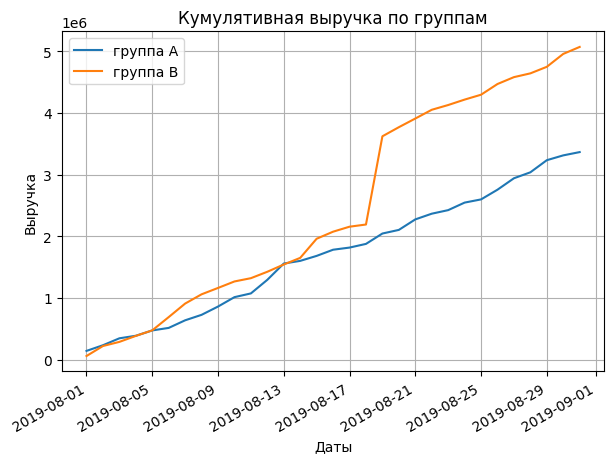

In [48]:
fig, ax = plt.subplots(figsize=(7,5))                                                         
ax.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='группа A')
ax.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='группа B')
fig.autofmt_xdate(rotation=30)
ax.set_xlabel('Даты')
ax.set_ylabel('Выручка')
ax.set_title('Кумулятивная выручка по группам')
plt.grid(True)
ax.legend()
plt.show()

На графике видно, изменения выручки в обеих группах носят практически линейный характер,<br> 
при этом 19 августа произошел резкий взлет куммулятивной выручки группы В, хотя до этого<br>
и после этого никаких сильных колебаний нет ни в группе А, ни в группе В.<br> 
Скорее всего была совершена либо одна большая покупка, либо много но маленьких. Обратим на это внимание.

<a id="cum_avg_price_plot"> </a>
#### График кумулятивного среднего чека по группам
<a href="#section1">Оглавление</a>

Посмотрим на измениения кумулятивного среднего чека и выявим причину резкого роста выручки 19 августа:

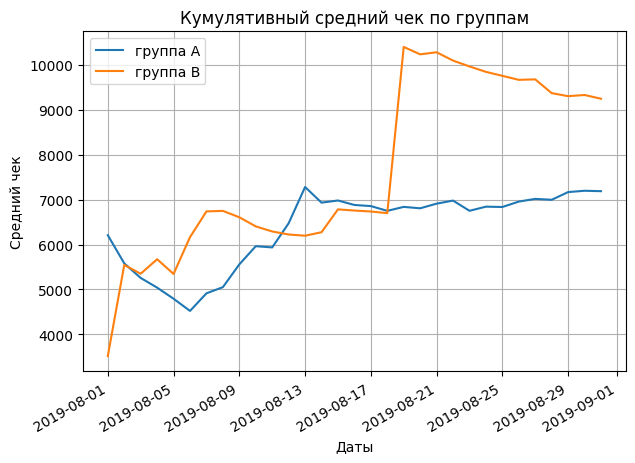

In [49]:
fig, ax = plt.subplots(figsize = (7,5))
ax.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'],
                                                                                   label='группа A')
ax.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'],
                                                                                   label='группа B')
fig.autofmt_xdate(rotation=30)
ax.set_xlabel('Даты')
ax.set_ylabel('Средний чек')
ax.set_title('Кумулятивный средний чек по группам')
plt.grid(True)
ax.legend()
plt.show()

Мы видим, что кривые группы А и группы В с переменным успехом росли до чуть менее 7000 к 18 августа.<br>
19 августа средний чек группы В резко вырос до примерно 10400, что составляет 150% роста. После чего <br>
стал немного "проседать" в оставшиеся дни августа. Средний чек группы А продолжил "слабый" рост в районе 7000.<br>
Резкий рост среднего чека чего говорит о покупках более дорогостоящих товаров.

<a id="rel_avg_plot"> </a>
#### График относительного изменения кумулятивного среднего чека
<a href="#section1">Оглавление</a>

Объеденим датасеты по группам в один для удобства расчетов:

In [50]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', 
                                                   right_on='date', how='left', suffixes=['A', 'B'])

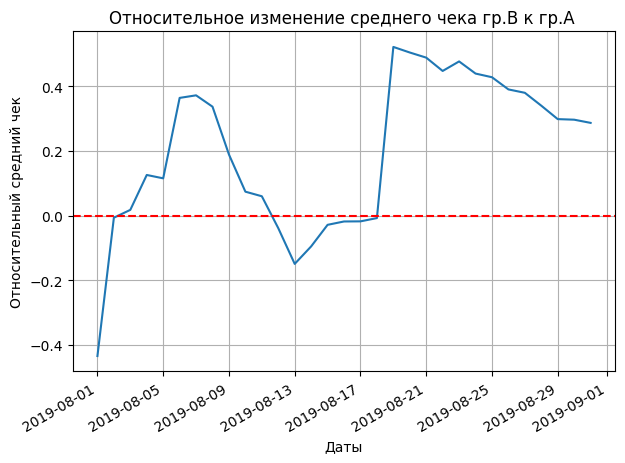

In [51]:
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(
                                          mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
fig.autofmt_xdate(rotation=30)
ax.set_xlabel('Даты')
ax.set_ylabel('Относительный средний чек')
ax.set_title('Относительное изменение среднего чека гр.В к гр.А ')
plt.grid(True)
ax.axhline(y=0, color='red', linestyle='--') 
plt.show()

Мы видим, что в нескольких точках колебания среднего чека группы В имеют очень сильные колебания<br>
Скоррее всего в эти даты были сделаны какие-то очень большие покупки.

<a id="cum_avg_order_qty_plot"> </a>
#### График кумулятивного среднего количества заказов
<a href="#section1">Оглавление</a>

Разобьем кумулятивный датасет на два по группам и полями 'date', 'orders', 'visitors':

In [52]:
cumulativeOrdersA = cumulativeData.query('group=="A"')[['date', 'orders', 'visitors']]
cumulativeOrdersB = cumulativeData.query('group=="B"')[['date', 'orders', 'visitors']]

Построим график кумулятивное среднее кол-во заказов:

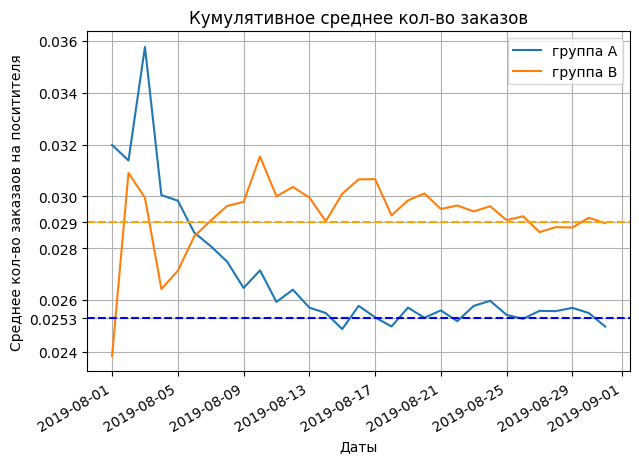

In [53]:
fig, ax = plt.subplots(figsize = (7,5))
ax.plot(cumulativeOrdersA['date'], cumulativeOrdersA['orders']/cumulativeOrdersA['visitors'],
                                                                                   label='группа A')
ax.plot(cumulativeOrdersB['date'], cumulativeOrdersB['orders']/cumulativeOrdersB['visitors'],
                                                                                   label='группа B')
fig.autofmt_xdate(rotation=30)
ax.set_xlabel('Даты')
ax.set_ylabel('Среднее кол-во заказаов на поситителя')
ax.set_title('Кумулятивное среднее кол-во заказов')
ax.axhline(y=0.0253, color='blue', linestyle='--') 
ax.axhline(y=0.029, color='orange', linestyle='--') 
plt.grid(True)
plt.yticks([0.024, 0.0253, 0.026, 0.028, 0.029, 0.030, 0.032, 0.034, 0.036],
            ['0.024', '0.0253', '0.026', '0.028', '0.029', '0.030', '0.032', '0.034', '0.036'])
ax.legend()
plt.show()

В первую декаду августа среднее кол-во заказов на посетителя что группе А, что в группе В сильно колебалось<br>
Однако уже после первой декады колебания значительно уменьшились и происходили вокруг значения 0.0253 в группе А<br>
и рядом с значением 0.029 в группе В. За исключением первых 7 дней теста группа В по данному параметру была лучше группы А<br> 

<a id="rel_cum_avg_order_qty"> </a>
#### График относительного изменения кумулятивного среднего количества заказов
<a href="#section1">Оглавление</a>

Соберем групповые датасеты в один для удобства расчетов:

In [54]:
mergedCumulativeOrders = cumulativeOrdersA.merge(cumulativeOrdersB, left_on='date', 
                                                   right_on='date', how='left', suffixes=['A', 'B'])

In [55]:
mergedCumulativeOrders.columns

Index(['date', 'ordersA', 'visitorsA', 'ordersB', 'visitorsB'], dtype='object')

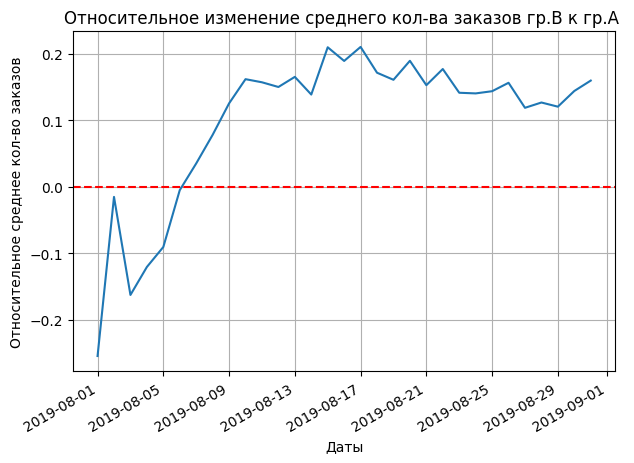

In [56]:
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(mergedCumulativeOrders['date'], (mergedCumulativeOrders['ordersB']/mergedCumulativeOrders['visitorsB'])/(
                                         mergedCumulativeOrders['ordersA']/mergedCumulativeOrders['visitorsA'])-1)
fig.autofmt_xdate(rotation=30)
ax.set_xlabel('Даты')
ax.set_ylabel('Относительное среднее кол-во заказов')
ax.set_title('Относительное изменение среднего кол-ва заказов гр.В к гр.А ')
plt.grid(True)
ax.axhline(y=0, color='red', linestyle='--') 
plt.show()

В первую неделю августа относительное среднее кол-во заказов было значительно ниже нулевой отметки<br>
Затем произошел резкий скачок вверх и относильное среднее кол-ва заказов превысило значение нуля.<br> 
. После 20 августа даты началось небольшое снижение показателя.

<a id="order_qty_scatter_plot"> </a>
#### Точечный график количества заказов по пользователям
<a href="#section1">Оглавление</a>

Создадим датасет с группировкой по пользователям и агрегрированными данными по кол-ву заказов 

In [57]:
ordersByUsers = (df_ord.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'}))
ordersByUsers.columns = ['userId', 'orders']

Построим график кол-во заказов по пользователям:

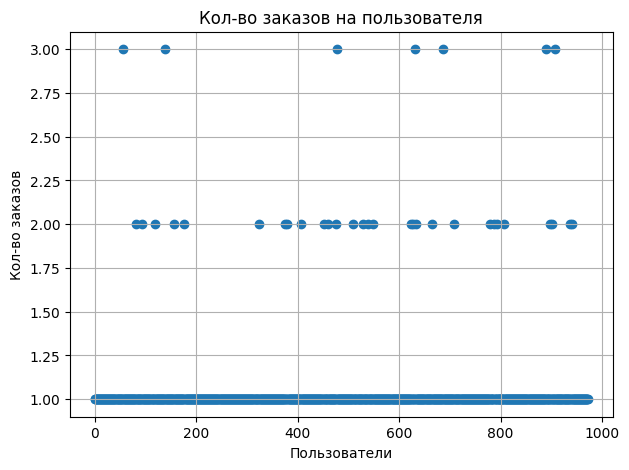

In [58]:
x_values = range(len(ordersByUsers))
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(x_values, ordersByUsers['orders'])
ax.set_xlabel('Пользователи')
ax.set_ylabel('Кол-во заказов')
ax.set_title('Кол-во заказов на пользователя')
plt.grid(True)
plt.show()

Как мы видим основная масса пользователей делает по 1 заказу, также есть достаточно много пользователей,<br>
которые делают по 2 и 3 заказа, но являются ли они выбросами мы пока сказать на можем.<br>
Посчитаем персентили 95 и 99 и примем решение по аномалиям.

<a id="orders_percentiles"> </a>
#### 95-й и 99-й перцентили количества заказов на пользователя
<a href="#section1">Оглавление</a>

In [59]:
perc_ord9 = np.percentile(ordersByUsers['orders'], [95, 99])
print(f'95% пользователей делают по {perc_ord9[0]} заказу(а) и только 1% делают {perc_ord9[1]} заказа(ов) и более.')

95% пользователей делают по 1.0 заказу(а) и только 1% делают 2.0 заказа(ов) и более.


***Таким образом, мы можем принять все кол-ва заказов выше 2 как аномальные.***

<a id="order_price_scatter_plot"> </a>
#### Точечный график стоимостей заказов
<a href="#section1">Оглавление</a>

Создадим датасет по стоимости заказов, для этого сгруппируем данные по номеру заказа и посчитаем их сумму:

In [60]:
revenueByorders = (df_ord.groupby('transactionId', as_index=False).agg({'revenue': 'sum'}))
ordersByUsers.columns = ['orders', 'revenue']

Построим график распределения стоимости заказов:

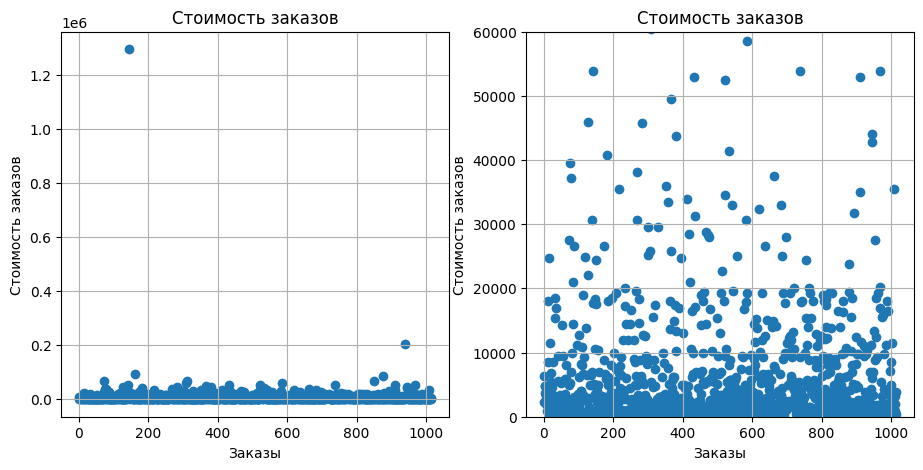

In [61]:
x_values = range(len(revenueByorders))
ylim_l = ['', (0,60000)]
fig, axs = plt.subplots(1, 2, figsize=(11, 5))
for i, ax in enumerate(axs.flat):    
    ax.scatter(x_values, revenueByorders['revenue'])
    ax.set_xlabel('Заказы')
    ax.set_ylabel('Стоимость заказов')
    ax.set_title('Стоимость заказов')
    ax.yaxis.grid(True)
    ax.xaxis.grid(True)
    ax.set_ylim(*ylim_l[i])
plt.show()

Как мы видим по левому графику стоимость заказов в основном не превышает 100000р, при этом есть 2 заказа,<br>
которые демонстрируют сильные выбросы: один заказ стоимостью около 1.3 млн руб, второй 200 000 руб. Что экстримально<br> 
выше остальных стоимости заказов.<br>
Правый график позволяет сделат более точную оценку стоимости заказов  в основном в пределах 10000 руб.<br>
При этом достаточно много заказов стоимостью от 10000 до 30000 руб. и не понятно можем ли мы их принять за аномалии.<br>
Посчитаем персентили 95 и 99 и примем решение по аномалиям.

<a id="order_price_percentiles"> </a>
#### 95-й и 99-й перцентили стоимости заказов
<a href="#section1">Оглавление</a>

In [62]:
perc_rev_by_ord9 = np.percentile(revenueByorders['revenue'], [95, 99])
print(f' у 95% заказов стоимость в среднем составляет не более {round(perc_rev_by_ord9[0],1)} руб.\
и только у 1% стоимость составляет {round(perc_rev_by_ord9[1], 1)} руб. и более')

 у 95% заказов стоимость в среднем составляет не более 26785.0 руб.и только у 1% стоимость составляет 53904.0 руб. и более


***Таким образом, мы можем считать все все заказы стоимостью выше 53900руб. аномалиями.***

<a id="raw_data"> </a>
#### Статистическая значимость различий между группами по «сырым» данным.
<a href="#section1">Оглавление</a>

Подготовим данные для оценки статистической значимости:

Создадим датасеты по заказам разбитые по группам А и В:

In [63]:
ordA = df_ord.query('group=="A"')
ordB = df_ord.query('group=="B"')

Создадим датасеты по заказам с разбивкой по группам А и В с информацией по дням:

In [65]:
daily_ordA = ordA.groupby('date', as_index=False).agg({'transactionId':'nunique', 'revenue':'sum'})
daily_ordA.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

In [66]:
daily_ordB = ordB.groupby('date', as_index=False).agg({'transactionId':'nunique', 'revenue':'sum'})
daily_ordB.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

Создадим датасеты по посетителям с разбивкой на группы А и В с информацией по дням

In [67]:
daily_visA = df_vis.query('group == "A"')[['date', 'visitors']]
daily_visB = df_vis.query('group == "B"')[['date', 'visitors']]
daily_visA.columns = ['date', 'visitorsPerDateA']
daily_visB.columns = ['date', 'visitorsPerDateB']

Создадим кумулятивные датасеты по группам А и В:

In [68]:
cumulativeA = cumulativeData.query('group == "A"')[['date', 'orders', 'buyers', 'revenue', 'visitors']]
cumulativeB = cumulativeData.query('group == "B"')[['date', 'orders', 'buyers', 'revenue', 'visitors']]
cumulativeA.columns = ['date', 'ordersCumA', 'buyersCumA', 'revenueCumA', 'visitorsCumA']
cumulativeB.columns = ['date', 'ordersCumB', 'buyersCumB', 'revenueCumB', 'visitorsCumB']

In [69]:
cumulativeB.head()

,date,ordersCumB,buyersCumB,revenueCumB,visitorsCumB
1,2019-08-01,17,17,59758,713
3,2019-08-02,40,39,221801,1294
5,2019-08-03,54,53,288850,1803
7,2019-08-04,68,66,385740,2573
9,2019-08-05,89,87,475648,3280


Объединим все созданные выше датасеты в один:

In [70]:
full_data = daily_ordA.merge(daily_ordB, on='date', how='left'
                     ).merge(daily_visA,  on='date', how='left'
                     ).merge(daily_visB,  on='date', how='left'
                     ).merge(cumulativeA, on='date', how='left'
                     ).merge(cumulativeB, on='date', how='left')        

In [71]:
full_data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,visitorsPerDateA,visitorsPerDateB,ordersCumA,buyersCumA,revenueCumA,visitorsCumA,ordersCumB,buyersCumB,revenueCumB,visitorsCumB
0,2019-08-01,23,142779,17,59758,719,713,23,19,142779,719,17,17,59758,713
1,2019-08-02,19,91602,23,162043,619,581,42,36,234381,1338,40,39,221801,1294
2,2019-08-03,24,112473,14,67049,507,509,66,60,346854,1845,54,53,288850,1803
3,2019-08-04,11,41176,14,96890,717,770,77,71,388030,2562,68,66,385740,2573
4,2019-08-05,22,86383,21,89908,756,707,99,92,474413,3318,89,87,475648,3280


Создадим датасет с информацией о пользователях, сделавших хотя бы один заказ - группа А:

In [72]:
ordersByUsersA = (df_ord[df_ord['group'] == 'A'].groupby('visitorId', as_index=False)
                                                .agg({'transactionId': 'nunique'}))
ordersByUsersA.columns = ['userId', 'orders']

Создадим массив с данными по заказам - у клиентов указано кол-во сделанных заказов, у тех кто ничего не заказывал стоят нули.

In [73]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(full_data['visitorsPerDateA'].sum() - 
                                                           len(ordersByUsersA['orders'])), name='orders')],axis=0)


Создадим датасет с информацией о пользователях, сделавших хотя бы один заказ - группа :

In [74]:
ordersByUsersB = (df_ord[df_ord['group'] == 'B'].groupby('visitorId', as_index=False)
                                                .agg({'transactionId': 'nunique'}))
ordersByUsersB.columns = ['userId', 'orders']

Создадим массив с данными по заказам - у клиентов указано кол-во сделанных заказов, у тех кто ничего не заказывал стоят нули.

In [75]:
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(full_data['visitorsPerDateB'].sum() - 
                                                           len(ordersByUsersB['orders'])), name='orders')],axis=0)

<a id="p_orders_calc"> </a>
##### Расчет значений *p-value* для заказов и относительного прироста среднего числа заказов группы B:
<a href="#section1">Оглавление</a>

Произведем расчет p-value с помощью непараметрического теста Манна-Уитни:

In [76]:
print("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

0.011


**Значение** *p-value* **меньше 0.05 Значит нулевую гипотезу мы отвергаем и считаем, что<br>
значимые различия между средними заказами группы А и группы В есть.**

In [77]:
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.160


Мы видим, что относительный прирост группы В к группе А составляет 16%

<a id="p_avg_calc"> </a>
##### Расчет значения *p-value* для средних чеков и  относительного различия в среднем чеке между группами:
<a href="#section1">Оглавление</a>

Произведем расчет p-value с помощью непараметрического теста Манна-Уитни:

In [78]:
print('{0:.3f}'.format(st.mannwhitneyu(ordA['revenue'], ordB['revenue'])[1]))

0.829


**Значение** *p-value* **значительно превышает 0.05 Значит нулевую гипотезу мы не отвергаем и считаем, что<br>
значимых различий между средними чеками группы А и группы В нет.**

In [79]:
print('{0:.3f}'.format(df_ord[df_ord['group']=='B']['revenue'].mean()/df_ord[df_ord['group']=='A']['revenue'].mean()-1)) 

0.287


Мы наблюдаем, что относительный прирост в среднем чеке группы В к группе А составляют 28.7%, при том, что значимых различий между группами нет

<a id="clean_data"> </a>
#### Статистическая значимость различий между группами по «очищенным» данным.
<a href="#section1">Оглавление</a>

Произведем очистку данных от аномалий:

In [80]:
ordersByUsersA = ordA.groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersA.columns = ['userId', 'orders']

In [81]:
ordersByUsersB = ordB.groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersB.columns = ['userId', 'orders']

Сколько пользователей, которые сделали более одного заказа?

In [82]:
perc_ord9

array([1., 2.])

In [83]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > perc_ord9[1]]['userId'],
                                 ordersByUsersB[ordersByUsersB['orders'] > perc_ord9[1]]['userId']], axis=0)

In [84]:
len(usersWithManyOrders)

7

Таких пользователей 7.<br>
А сколько пользователей сумма заказа которых выше 53900руб.? 

In [85]:
usersWithExpensiveOrders = df_ord[df_ord['revenue'] > perc_rev_by_ord9[1]]['visitorId']

In [86]:
len(usersWithExpensiveOrders)

9

Таких пользователей 9<br>
Объеденим их в один набор - эксклюзивные пользователи:

In [87]:
abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
                            .drop_duplicates().sort_values())

<a id="p_orders_calc2"> </a>
##### Расчет значений *p-value* для среднего кол-ва заказов и относительного прироста среднего очищенной группы B:
<a href="#section1">Оглавление</a>

Создадим массив с данными по заказам - у клиентов указано кол-во сделанных заказов, у тех кто ничего не заказывал стоят нули.

In [88]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
                                            ]['orders'],
                                            pd.Series(0, index=np.arange(
                                            full_data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
                                            ),
                                            name='orders')], axis=0)

Создадим массив с данными по заказам - у клиентов указано кол-во сделанных заказов, у тех кто ничего не заказывал стоят нули.

In [89]:
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
                                            ]['orders'],
                                            pd.Series(0, index=np.arange(
                                            full_data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
                                            ),
                                            name='orders')], axis=0)

Произведем расчет p-value с помощью непараметрического теста Манна-Уитни:

In [90]:
print('p-value =','{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

p-value = 0.007


**Значение** *p-value* **значительно меньше 0.05 Значит нулевую гипотезу мы отвергаем и считаем, что<br>
значимые различия между средними заказами группы А и группы В есть.**

In [91]:
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.189


Относительный прирост среднего "очищенной" группы В вырос по сравнению с "сырыми" данными с 16% до 18.9%.

<a id="p_avg_calc2"> </a>
##### Расчет значения *p-value* для средних чеков и относительного прироста среднего чека очищенной группы B:
<a href="#section1">Оглавление</a>

Произведем расчет p-value с помощью непараметрического теста Манна-Уитни:

In [92]:
print('p-value =',
    '{0:.3f}'.format(
        st.mannwhitneyu(
            ordA[~ordA['visitorId'].isin(abnormalUsers)]['revenue'],
            ordB[~ordB['visitorId'].isin(abnormalUsers)]['revenue'])[1]))

p-value = 0.788


**Значение** *p-value* **уменьшилось, но все равно значительно превышает** ***0.05***<br> 
**Значит нулевую гипотезу мы не отвергаем и считаем, что<br>
значимых различий между средними чеками группы А и группы В нет.**

In [93]:
print("{0:.3f}".format(ordB[~ordB['visitorId'].isin(abnormalUsers)]['revenue'].mean()
        / ordA[~ordA['visitorId'].isin(abnormalUsers)]['revenue'].mean() - 1))

-0.032


В результате мы видим, что относительный прирост среднего чека очищенной группы В к очищенной группе А отсутствует, наблюдаем падение это показателя

<a id="resume"> </a>
### Итоги A/B теста
<a href="#section1">Оглавление</a>

1. Тест проводился с 1 августа по 31 августа 2019 года
2. В тесте анализировались 2 группы 
3. Группы были равны по размерам
4. В результате анализа групп были выявлены аномалии по кол-ву и стоимости заказов
5. Произведена оценка статистической значимости различий в группах на "сырых" данных и <br>
   расчитаны зачения p-value для заказов и средних чеков:<br>
   а. Оценка p-value для ср.кол-ва заказов указала на наличие значимых различий в группах, а значение<br> относительного прироста среднего кол-ва заказов составило 16%<br>
   b. оценка p-value для ср.чеков не выявила статистически значимых различий между группами,<br>
   а значение относительного различия средних чеков в группах составило 28.7%<br>   
6. Произведена оценка статистической значимости различий в группах на "очищенных" данных и <br>
   расчитаны зачения p-value для заказов и средних чеков:<br>
   а. Оценка p-value для ср.кол-ва заказов указала на наличие значимых различий в группах А и В, а значение<br> относительного прироста среднего кол-ва заказов выросло с 16% (сырые данные)  до 18.9% <br>
   (очищенные данные)<br>
   b. Оценка p-value для средних чеков уменьшилась, но тем не менее, значительно превышает 0.05, что<br> говорит нам об  отсутствии значимых различий между средними чеками групп А и В.Значение относительного изменения средниих чеков резко изменилось с 28% на "сырых" данных до -3.2% на "чистых"<br>
7. Наши метрики по разному себя ведут в данном тесте:<br> 
    а. метрика по средним заказам - есть значимые различия, что подтверждается  и значением относительного роста ср.кол-ва заказов группы В к группе А более 16%<br>
    b. метрика по чекам - значимых различий нет. На "чистых" данных относительнй прирост средних чеков группы В к группе А упал до -3.2%, что может подтверждать значение p-value об отсутствии значимых различий.<br>
8. Учитывая выше перечисленное следует остановить проведение теста и в случае со средним кол-вом заказов признать победу группы В над группой А, в случае со средней стоимостью заказов мы фиксируем отстутствие различий в группах

<a id="general_resume"> </a>
## Общие выводы
<a href="#section1">Оглавление</a>

В ходе исследования были выполнены следующие моменты:<br>
    *1. Произведен анализ предложенных гипотез методами ICE и RICE и получены приоритеты для каждой<br> 
       гипотезы. Что позволило принять в работу гитотезу с наивысшим приоритетом.<br>
    2. Проведено изучение данных полученых в ходе А/В теста и выявлено следующее:*<br>
    &emsp;* пропуски в данных отстутствуют<br>
    &emsp;* дубликаты отстутствуют<br>
    &emsp;* датасет visitors поделен на две равные группы<br>
    &emsp;* датасет orders поделен на 2 группы неравномерно и более того часть покупателей в группах пересекалась.<br>
          В связи с этим для качественной оценки результатов А/В теста данные моменты были устранены<br>
    *3. В ходе исследовательского анализа были выполнены следующие шаги:*<br> 
    &emsp;* проведен анализ датасета orders на предмет изменения кумулятивной выручки по группам<br> 
    &emsp;в ходе проведения теста и визуализирован результат:<br>
    &emsp;изменения выручки в обеих группах носят практически линейный характер,<br> 
    &emsp;при этом 19 августа происходит резкий взлет куммулятивной выручки группы В, хотя до этого<br>
    &emsp;и после этого никаких сильных колебаний нет ни в группе А, ни в группе В.<br> 
    &emsp;Значит в этот день была совершена одна большая покупка, так как при дальнейшем анализе<br> 
    &emsp;каких-либо резких скачков ср.кол-ва заказов на эту дату вывлено не было<br>
    &emsp;* Визуализированы результаты анализа кумулятивного среднего чека в разных группах и выявлено:<br>
    &emsp;что кривые группы А и группы В с переменным успехом росли до чуть менее 7000 к 18 августа.<br>
    &emsp;19 августа средний чек группы В резко вырос до примерно 10400, что составляет 150% роста. После чего <br>
    &emsp;стал немного "проседать" в оставшиеся дни августа. Средний чек группы А продолжил "слабый" рост в районе 7000.<br>
    &emsp;Резкий рост среднего чека чего говорит о покупке более дорогостоящего товара или товаров<br>
    &emsp;* Характер изменений относительного среднего чека группы В к группе А визуализированный<br> 
    &emsp;на соответствующем графике демонстрирует резкие колебания в нескольких точках, что говорит<br> 
    &emsp;о крупных заказах и выбросах<br>
    &emsp;* Изменения графика кумулятивного среднего кол-ва заказов демонстрируют, что в первую декаду<br>
    &emsp;августа среднее кол-во заказов на посетителя что группе А, что в группе В сильно колебалось.<br>
    &emsp;Однако уже после первой декады колебания значительно уменьшились и происходили вокруг значения 0.0253 в группе А<br>
    &emsp;и рядом с значением 0.029 в группе В. Кроме первых 7 дней теста группа В по данному параметру была лучше группы А<br>
    &emsp;* На графике относительного кумулятивного среднего кол-ва заказов мы можем наблюдать в первую неделю августа <br>
    &emsp;относительное среднее кол-во заказов было значительно ниже нулевой отметки<br>
    &emsp;Затем произошел резкий скачок вверх и относильное среднее кол-ва заказов превысило значение нуля.<br> 
    &emsp;После 20 августа даты началось небольшое снижение показателя.<br> 
    &emsp;* Точечный график кол-ва заказов позволяет получить картину распределения заказов по пользователям и <br>
    &emsp;визуально выявить аномалии - заказы клиентов более 2<br> 
    &emsp;* Расчет 95 и 99 персентилей подтвердил вывод сделанный выше о том, что все заказы более 2 можно <br>
    &emsp;считать аномалиями<br>
    &emsp;* Точечный график стоимости заказов позволяет получить картину распределения и выбросов стоимости заказов<br>
    &emsp;по пользователям, при этом по полученному распределению непросто сделать вывод об аномалиях, за исключением 2-х,<br>
    &emsp;которые имеют экстимально высокие значения по сравнению с другими заказами. Расчет персентилей облегчил нашу <br>
    &emsp;задачу определения аномалий в наборе данных<br>
    &emsp;* Расчет 95 и 99 персентилей стоимости заказов позволил определить аномальные стоимости заказов - <br>
    &emsp;заказы cтоимостью более 53400 руб.<br>
    &emsp;* Для определения наличия статистической значимости различия в группах, участвовавших в тесте, мы расчитали<br>
    &emsp;значение p-value с помощью непараметрического теста Манна-Уитни. Расчет проводился для "сырых" данных<br> 
    &emsp;и "очищенных", для ср. кол-ва заказов и ср. стоимостей заказов. Расчитанные p-value для кол-ва заказов выявили <br>
    &emsp;статистически значимые различия в группах как по "сырым" данным, так и по "очищенным".<br>
    &emsp;В свою очередь, p-value для средней стоимости заказа не выявил значимых различий между группами,<br>
    &emsp;ни в "сырых" данных, ни в "очищенных".<br>
    &emsp;* Расчет относительного изменения кол-ва заказов группы В к группе А показал прирост в 16% в случае<br>
    &emsp;"сырых" данных и 18% прирост в случае "чистых" данных.<br>
    &emsp;* Расчет относительного изменения средней стоимости заказов группы В к группе А продемонстрировал падение<br>
    &emsp;значения с 28.7% в случае "сырых" данных до -3.2% в случае с "очищенными" данными, что подтверждает<br>
    &emsp;отстутствие различий в группах А и В<br>
    &emsp;Таким обрзов следует остановить проведение теста и в случае со средним кол-вом заказов признать<br> 
    &emsp;победу группы В над группой А, в случае со средней стоимостью заказов мы фиксируем отстутствие<br> 
    &emsp;различий в группах.